# Part II - SanFran GoBike Data Presentation
## by Gerardo Najarro

## Investigation Overview


> The overall goal of the investigation is to explore patterns in bike trips, focusing on how engagement varies with time of day, location, and duration based on demographic influences. Key insights include the observation of outlier durations and unusual station plotting, a negative relationship between age and trip duration, gender-based differences in trip lengths, and the surprising late-night activity predominantly driven by female riders.


## Dataset Overview and Executive Summary

> The dataset encompasses detailed records from a bike-sharing system in San Francisco, capturing various aspects such as trip durations, start and end times, start and end stations, and demographic information, including member age and gender. With over 183,000 entries, this dataset offers insights into user behavior and trip characteristics within the bike-sharing network. The dataset has been cleaned and, as such, represents a more accurate and condensed sample group.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('gobike_data_clean.csv')

## How does gender influence when a trip is made and the duration it will be?

> Objective: To show how average trip duration varies by hour of the day for different genders.

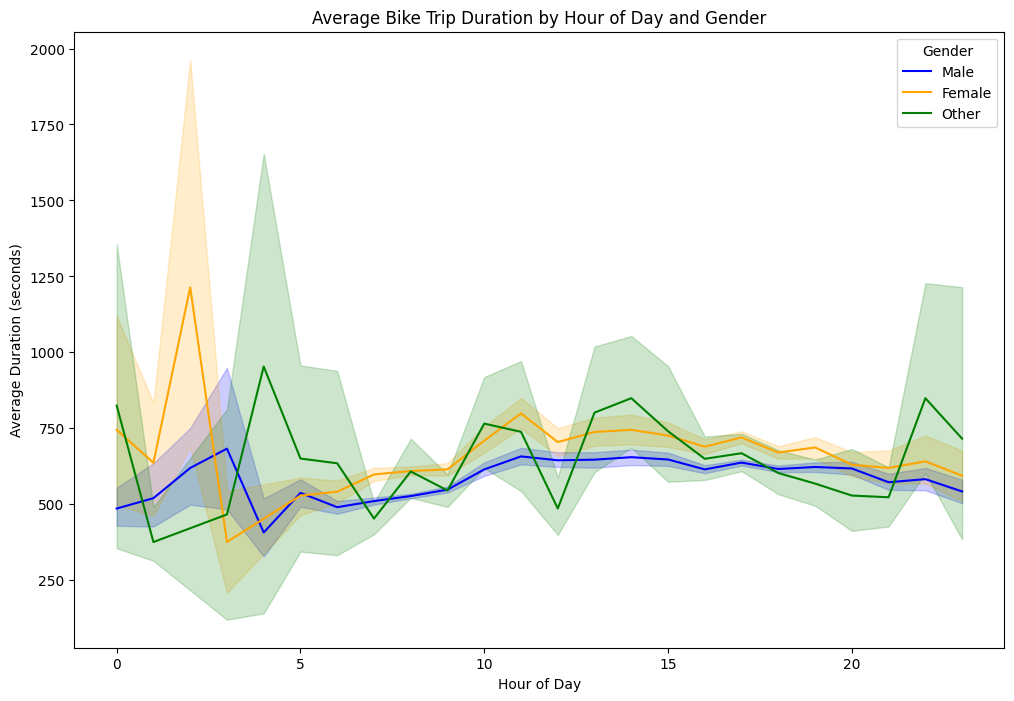

In [8]:
# Define a color palette with distinguishable colors
palette = {
    'Male': 'blue',
    'Female': 'orange',
    'Other': 'green'
}

# Create a line plot
plt.figure(figsize=(12, 8))
sns.lineplot(
    x='hour_of_day',  # Hour of the day on x-axis
    y='duration_sec',  # Average duration on y-axis
    hue='member_gender',  # Color by gender
    data=df,
    estimator='mean',  # Compute the mean duration
    palette=palette  # Use the custom color palette
)

# Add plot title and labels
plt.title('Average Bike Trip Duration by Hour of Day and Gender')
plt.xlabel('Hour of Day')
plt.ylabel('Average Duration (seconds)')
plt.legend(title = "Gender") 

# Show the plot
plt.show()

> Answer: The graph shows that while the three gender groups do have similar behavior, someone who identifies as female will on average ride for longer throughout the day and will be more likely to ride at night between 2am to 3am.

## How do bike trip durations differ between genders?

> Objective: To compare the distribution of bike trip durations across different genders. It highlights variations in trip length by gender, showing the central tendency, spread, and potential outliers for each gender group.

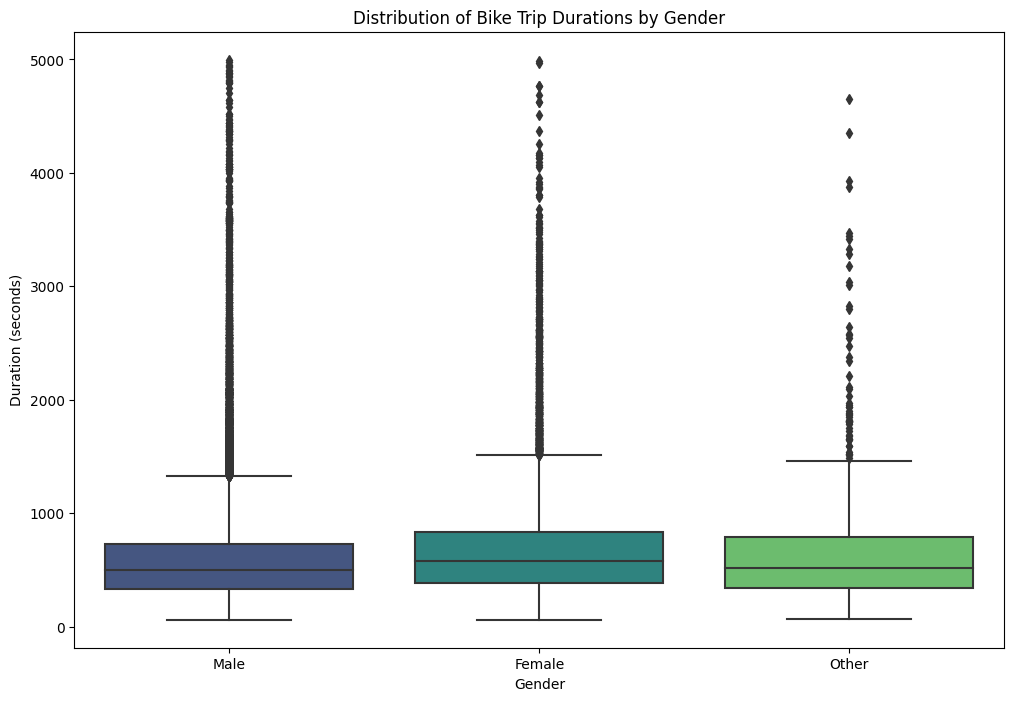

In [30]:
# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='member_gender',  # Gender on x-axis
    y='duration_sec',   # Duration on y-axis
    data=df,
    palette='viridis'
)

# Add plot title and labels
plt.title('Distribution of Bike Trip Durations by Gender')
plt.xlabel('Gender')
plt.ylabel('Duration (seconds)')

# Show the plot
plt.show()

> Answer: This graph shows us that on average a female bike rider will have longer durations than any other gender, but a male bike rider is more likely to go beyond the 3,000 seconds mark than any other gender.

## How does trip duration vary with age across different density regions in the dataset?

> Objective: By using a hexbin plot, we can gain insights into how different age groups experience varying trip durations and understand the density and distribution of these experiences across the dataset.

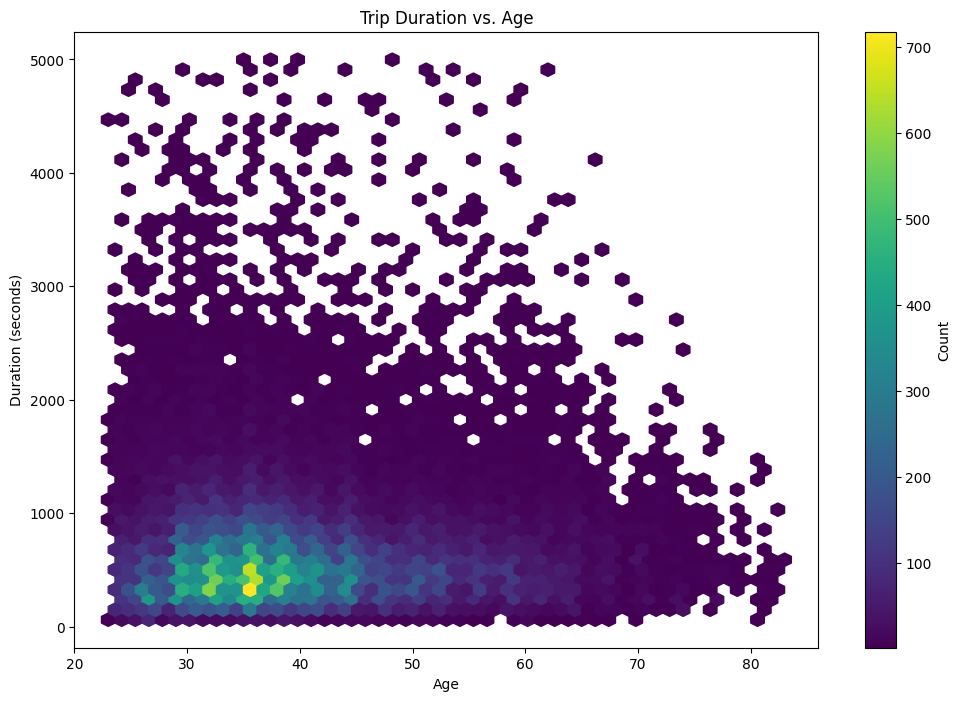

In [31]:
# Create a hexbin plot using member_age and duration_sec
plt.figure(figsize=(12, 8))
plt.hexbin(
    df['member_age'],
    df['duration_sec'],
    gridsize=50,  # Size of the hexagons
    cmap='viridis',  # Color map
    mincnt=1  # Minimum number of points in a hexagon to be colored
)

# Add plot title and labels
plt.title('Trip Duration vs. Age')
plt.xlabel('Age')
plt.ylabel('Duration (seconds)')
plt.colorbar(label='Count')  # Colorbar to indicate the count of points in each hexagon

# Show the plot
plt.show()

> Answer: The graph shows that younger riders are more likely to use the bike-sharing system for between 0 to 1000 seconds. It also shows that as the riders become older, they are less likely to ride their bikes for longer durations. A decline begins to occur around the ages of 50 to 60.